# Classification problem using Artificial Neural Network

In [ ]:
#Problem statement: Here we are predictiong whether or not a customer stays or leaves using Artificail Neural Networks

In [1]:
#Installing and importing the dependencies
import pandas as pd  # pandas for data manipulation

In [2]:
import numpy as np    #Numpy for multidimensional arrrays and mathematical functions

In [3]:
import matplotlib.pyplot as plt   # for visualization

# Exploratory data analysis

In [ ]:
#Reading or importing the dataset

In [4]:
Churn_Modelling=pd.read_csv("Churn_Modelling.csv")

In [5]:
Churn_Modelling.head(5)     # To have  a glance of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
Churn_Modelling.dtypes  # We must know the datatypes of our features

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Converting the datatypes of our features
Churn_Modelling["Exited" ]=Churn_Modelling["Exited" ].astype("category")
Churn_Modelling["HasCrCard" ]=Churn_Modelling["HasCrCard" ].astype("category")
Churn_Modelling["IsActiveMember" ]=Churn_Modelling["IsActiveMember" ].astype("category")
Churn_Modelling.dtypes
Churn_Modelling.head(2)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [8]:
# Decoupling

In [9]:
y=Churn_Modelling["Exited"]
x=Churn_Modelling.drop("Exited", axis=1)
y.head(2)

0    1
1    0
Name: Exited, dtype: category
Categories (2, int64): [0, 1]

# Dummification

In [10]:
Geography=pd.get_dummies(x["Geography"], drop_first=True)
Gender=pd.get_dummies(x["Gender"], drop_first=True)

In [11]:
x=pd.concat([x,Geography,Gender],axis=1)
x.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0


In [12]:
x=x.drop(["Geography", "Gender"], axis=1)
x.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [13]:
x=x.drop(["RowNumber"], axis=1)
x.head(2)
x=x.drop(["Surname"], axis=1)

In [1]:
# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)



# Model Training

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [22]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 30)


E:\New folder\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 5359 samples, validate on 2641 samples
Epoch 1/30
5359/5359 [==============================] - 4s 759us/step - loss: 0.5817 - accuracy: 0.7494 - val_loss: 0.5044 - val_accuracy: 0.7955
Epoch 2/30
5359/5359 [==============================] - 3s 488us/step - loss: 0.4881 - accuracy: 0.7962 - val_loss: 0.4795 - val_accuracy: 0.7955
Epoch 3/30
5359/5359 [==============================] - 2s 445us/step - loss: 0.4665 - accuracy: 0.7962 - val_loss: 0.4654 - val_accuracy: 0.7959
Epoch 4/30
5359/5359 [==============================] - 2s 445us/step - loss: 0.4531 - accuracy: 0.7962 - val_loss: 0.4564 - val_accuracy: 0.7955
Epoch 5/30
5359/5359 [==============================] - 2s 442us/step - loss: 0.4439 - accuracy: 0.7964 - val_loss: 0.4506 - val_accuracy: 0.7955
Epoch 6/30
5359/5359 [==============================] - 2s 452us/step - loss: 0.4373 - accuracy: 0.7970 - val_loss: 0.4463 - val_accuracy: 0.7959
Epoch 7/30
5359/5359 [==============================] - 2s 375us/step - loss

In [23]:
print(model_history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


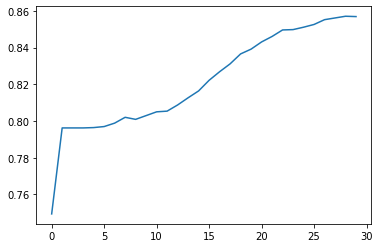

In [24]:
plt.plot(model_history.history['accuracy'])

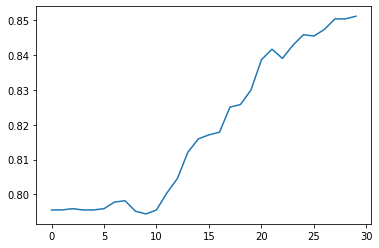

In [26]:
plt.plot(model_history.history['val_accuracy'])


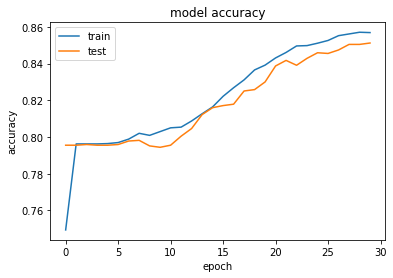

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


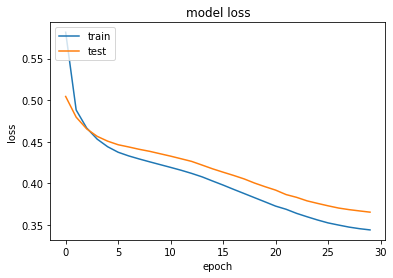

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# prediction
pred=classifier.predict(x_test)
pred=(pred>0.5)

In [34]:
# Performance matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1514   81]
 [ 208  197]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.86      0.84      2000



In [36]:
# Accuray score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, pred)
print("The accuracy of the model on the test data using ANN is=", score)

The accuracy of the model on the test data using ANN is= 0.8555
